<a href="https://colab.research.google.com/github/sathamhussain7/task-6/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [ ]:
df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [ ]:
df.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [ ]:
df.shape

(804, 12)

In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df=df.drop_duplicates()
df.shape

(804, 12)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
iqr = df['Mileage'].quantile(0.75) - df['Mileage'].quantile(0.25)
upper_threshold = df['Mileage'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Mileage'].quantile(0.25) - (1.5 * iqr)


print('iqr :',iqr)
print('upper_threshold : ',upper_threshold)
print('lower_threshold :',lower_threshold)
if upper_threshold > df['Mileage'].max():
  print('No outlier in upper_threshold ')
else:
  print('outlier in upper_threshold')
if lower_threshold< df['Mileage'].min():
   print('No outlier in lower_threshold ')
else:
  print('outlier in lower_threshold')

iqr : 10589.5
upper_threshold :  41097.25
lower_threshold : -1260.75
outlier in upper_threshold
No outlier in lower_threshold 


In [ ]:
#df.Mileage = df.Mileage.clip(-1260.75,41097.25)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


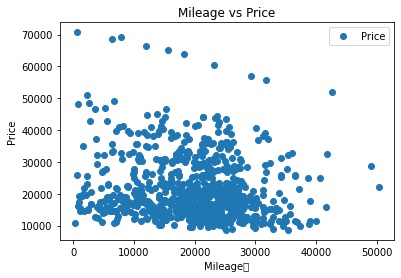

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage	')
plt.ylabel('Price')
plt.show()
df[['Mileage','Price']].corr()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


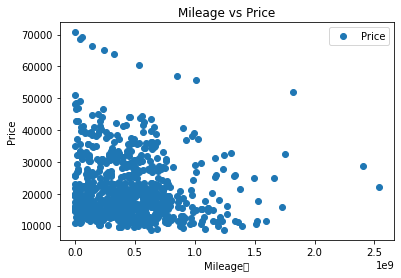

,transformed,Price
transformed,1.000000,-0.117232
Price,-0.117232,1.000000


In [ ]:
df['transformed']=np.square(df['Mileage'])
df.plot(x='transformed', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage	')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


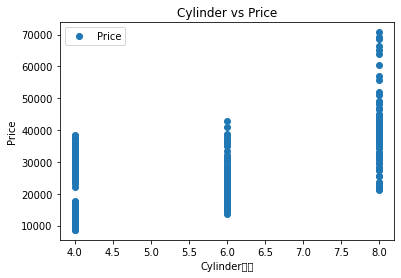

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [ ]:
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder		')
plt.ylabel('Price')
plt.show()
df[['Cylinder','Price']].corr()

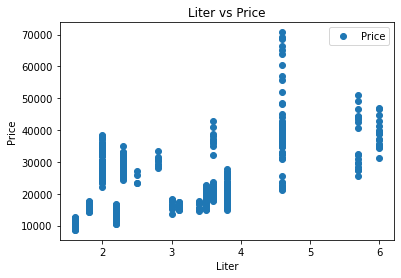

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [ ]:
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()
df[['Liter','Price']].corr()

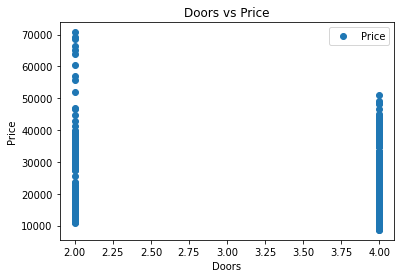

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors','Price']].corr()

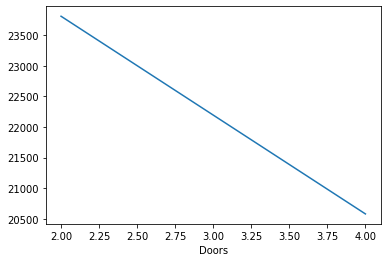

In [ ]:
df.groupby('Doors')['Price'].mean().plot()
plt.show()
df[['Doors','Price']].corr()

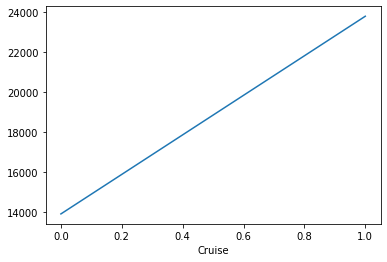

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [ ]:
df.groupby('Cruise')['Price'].mean().plot()
plt.show()
df[['Cruise','Price']].corr()

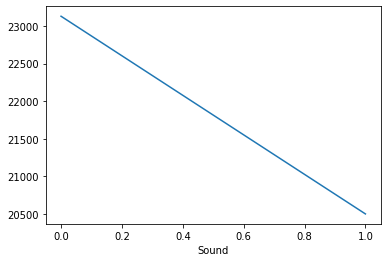

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df.groupby('Sound')['Price'].mean().plot()
plt.show()
df[['Sound','Price']].corr()

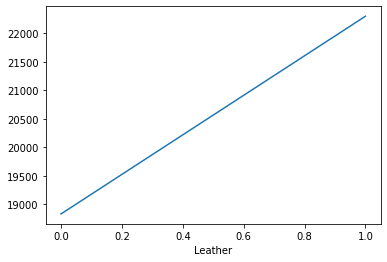

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df.groupby('Leather')['Price'].mean().plot()
plt.show()
df[['Leather','Price']].corr()

In [ ]:
X = df[['Mileage']].values # select all rows and select all columns except the last column as my feature
y = df['Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # predicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c


LinearRegression()

In [ ]:
print(regressor.intercept_) # c

25558.42305467979


In [ ]:
print(regressor.coef_) # slope - m

[-0.20513393]


# price=(-0.20513393*Mileage)+25558.42305467979

<function matplotlib.pyplot.show(*args, **kw)>

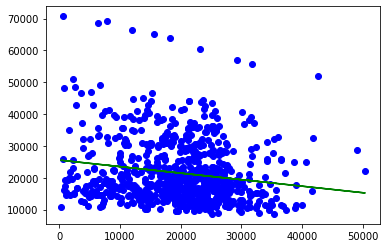

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,regressor.predict(X),color='green')
plt.show

In [ ]:
from sklearn import metrics 

print('R2-SCORE:',regressor.score(X_test,y_test))

R2-SCORE: -0.0198294858161554


In [ ]:
X = df[['Mileage','Cylinder',	'Liter',	'Doors',	'Cruise',	'Sound',	'Leather']].values # select all rows and select all columns except the last column as my feature
y = df['Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data 

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # predicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

21534.779598669655


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage','Cylinder',	'Liter',	'Doors',	'Cruise',	'Sound',	'Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Mileage,-1621.043761
Cylinder,6009.463638
Liter,-1738.545807
Doors,-1454.125525
Cruise,2979.117656
Sound,-912.293055
Leather,1607.873911


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([25881.96154932, 24521.9098213 , 26433.03476015, 24333.74085486,
       35162.94833238, 15420.82851302,  8288.87222103, 21530.83441308,
       22416.45301896, 25349.79618128, 25396.61461412, 36737.66742214,
       27573.40090598, 20054.34718739, 23046.39766012, 20084.94704247,
       27213.43180274, 28684.86268857, 21367.74159586, 30418.52575923,
       25793.83616317, 19697.88654187, 24163.87342987, 26327.38029143,
       29298.75981685, 16907.6309948 , 24158.09147177, 20874.03056272,
       35988.30324691, 18886.93240864, 26439.59745743, 27974.13491028,
       35370.64221879, 27000.1979349 , 28131.0896048 ,  9759.55163369,
       25681.46484584, 26431.37118015, 11343.22251211, 13176.60345668,
       23369.35245405, 14205.5234378 , 21393.5672705 , 26712.68753705,
       23419.29387682, 18158.83223907, 26508.95334855, 25133.83183251,
       29632.20970221, 22636.87125118, 15115.43605064, 31355.67651312,
       34058.49654026, 20997.69398053, 12944.02072514, 17103.25388648,
      

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('R2-SCORE:',regressor.score(X_test,y_test))

R2- SCORE: 0.365533248874529
R2-SCORE: 0.365533248874529


In [ ]:
comb=df.columns[[1,6,7,8,9,10,11]]
comb

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], dtype='object')

In [ ]:
import itertools

In [ ]:
res=[]

for i in range(1,1+len(comb)):
  for combo in itertools.combinations(comb,i):
    res.append (list(combo))
    #print (i,combo)
print(res) 

[['Mileage'], ['Cylinder'], ['Liter'], ['Doors'], ['Cruise'], ['Sound'], ['Leather'], ['Mileage', 'Cylinder'], ['Mileage', 'Liter'], ['Mileage', 'Doors'], ['Mileage', 'Cruise'], ['Mileage', 'Sound'], ['Mileage', 'Leather'], ['Cylinder', 'Liter'], ['Cylinder', 'Doors'], ['Cylinder', 'Cruise'], ['Cylinder', 'Sound'], ['Cylinder', 'Leather'], ['Liter', 'Doors'], ['Liter', 'Cruise'], ['Liter', 'Sound'], ['Liter', 'Leather'], ['Doors', 'Cruise'], ['Doors', 'Sound'], ['Doors', 'Leather'], ['Cruise', 'Sound'], ['Cruise', 'Leather'], ['Sound', 'Leather'], ['Mileage', 'Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Leather'], ['Mileage', 'Liter', 'Doors'], ['Mileage', 'Liter', 'Cruise'], ['Mileage', 'Liter', 'Sound'], ['Mileage', 'Liter', 'Leather'], ['Mileage', 'Doors', 'Cruise'], ['Mileage', 'Doors', 'Sound'], ['Mileage', 'Doors', 'Leather'], ['Mileage', 'Cruise', 'Sound'], ['Mileage', 'Cruis

In [ ]:
len(res)

127

In [ ]:
r2=[]
for i in res:
  
 x1=df[i].values
 y=df['Price'].values

 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=5)
  

 
 from sklearn.preprocessing import StandardScaler ## standrard scaling 
 scaler = StandardScaler() #initialise to a variable
 scaler.fit(X_train) # we are finding the values of mean and sd from the td
 X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
 X_test_scaled = scaler.transform(X_test) # transform the test data 


 from sklearn.linear_model import LinearRegression
 regressor = LinearRegression()
 regressor.fit(X_train_scaled, y_train)

 y_pred = regressor.predict(X_test_scaled)
 from sklearn import metrics
 r2.append(metrics.r2_score(y_test,y_pred))
print(r2)

[-0.013823003638400166, 0.3534041428190665, 0.3774464691951993, 0.04937589033291556, 0.1929430095710959, -0.013763549052907775, 0.04141535980293598, 0.3455866058540853, 0.3670762886607323, 0.03676679349765144, 0.1895899906542522, -0.022748362049233695, 0.026724360428990068, 0.35888393993196965, 0.38025616554043484, 0.41801915684060353, 0.34725363586687963, 0.3671289296264949, 0.388322134956544, 0.4261448198905653, 0.36715081539611816, 0.38440166083848715, 0.23063957983372885, 0.03935317530900129, 0.0856544612070067, 0.18617025289076072, 0.22934203975794198, 0.033173246315356564, 0.3526350476007952, 0.36958774823547147, 0.4141251896066692, 0.3407302248196332, 0.3571719479509826, 0.3755720740967198, 0.42005303365169155, 0.3585632195445283, 0.3716112442915148, 0.22670388629122018, 0.02914162187315561, 0.07004738258527998, 0.18479799339637404, 0.22186269706202966, 0.02118279899494968, 0.3768821316090962, 0.41503385133367166, 0.3547072681142095, 0.371297394586397, 0.4431655132342518, 0.3724

In [ ]:
len(r2)

127

In [ ]:
df3=pd.DataFrame({'feature combinations':res,'r2_score':r2})
df3

,feature combinations,r2_score
0,[Mileage],-0.013823
1,[Cylinder],0.353404
2,[Liter],0.377446
3,[Doors],0.049376
4,[Cruise],0.192943
...,...,...
122,"[Mileage, Cylinder, Liter, Cruise, Sound, Leat...",0.418218
123,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.433442
124,"[Mileage, Liter, Doors, Cruise, Sound, Leather]",0.417782
125,"[Cylinder, Liter, Doors, Cruise, Sound, Leather]",0.440435


In [ ]:
print(df3['r2_score'].max())
#print(df3['r2_score'].argmax())
df3['feature combinations'][df3['r2_score'].argmax()]

0.4501359385599063


['Cylinder', 'Doors', 'Cruise', 'Leather']

**task hard mode**

Research dummy variables in scikit-learn to see how to use the make, model, and body type.
Find the best combination of factors to predict price.

In [3]:
df1=pd.get_dummies(df[['Make']])
df1

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
799,0,0,0,0,0,1
800,0,0,0,0,0,1
801,0,0,0,0,0,1
802,0,0,0,0,0,1


In [4]:
df4=pd.concat([df,df1],axis=1,join='inner')
df4

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1,0,0,0,0,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1,0,0,0,0,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,1,0,0,0,0,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,1,0,0,0,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,0,0,0,0,0,1
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0,0,0,0,0,1
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0,0,0,0,0,1
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0,0,0,0,0,1


In [5]:
df4=df4.drop(columns=['Make',	'Model','Trim',	'Type'])
df4

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,0,0,0,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,0,0,0,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,0,0,0,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,0,0,0,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,0,0,0,1
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,0,0,0,1
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,0,0,0,1
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,0,0,0,1


In [6]:
feat=df4.columns[1:]
feat

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather',
       'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn'],
      dtype='object')

In [7]:
import itertools

In [8]:
resu=[]

for j in range(1,1+len(feat)):
  for comb in itertools.combinations(feat,j):
    resu.append (list(comb))
    #print (i,combo)
print(resu) 

[['Mileage'], ['Cylinder'], ['Liter'], ['Doors'], ['Cruise'], ['Sound'], ['Leather'], ['Make_Buick'], ['Make_Cadillac'], ['Make_Chevrolet'], ['Make_Pontiac'], ['Make_SAAB'], ['Make_Saturn'], ['Mileage', 'Cylinder'], ['Mileage', 'Liter'], ['Mileage', 'Doors'], ['Mileage', 'Cruise'], ['Mileage', 'Sound'], ['Mileage', 'Leather'], ['Mileage', 'Make_Buick'], ['Mileage', 'Make_Cadillac'], ['Mileage', 'Make_Chevrolet'], ['Mileage', 'Make_Pontiac'], ['Mileage', 'Make_SAAB'], ['Mileage', 'Make_Saturn'], ['Cylinder', 'Liter'], ['Cylinder', 'Doors'], ['Cylinder', 'Cruise'], ['Cylinder', 'Sound'], ['Cylinder', 'Leather'], ['Cylinder', 'Make_Buick'], ['Cylinder', 'Make_Cadillac'], ['Cylinder', 'Make_Chevrolet'], ['Cylinder', 'Make_Pontiac'], ['Cylinder', 'Make_SAAB'], ['Cylinder', 'Make_Saturn'], ['Liter', 'Doors'], ['Liter', 'Cruise'], ['Liter', 'Sound'], ['Liter', 'Leather'], ['Liter', 'Make_Buick'], ['Liter', 'Make_Cadillac'], ['Liter', 'Make_Chevrolet'], ['Liter', 'Make_Pontiac'], ['Liter', 'Ma

In [10]:
len(resu)

8191

In [11]:
r2s=[]
for i in resu:
  
 x2=df4[i].values
 y=df['Price'].values

 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=5)
  

 
 from sklearn.preprocessing import StandardScaler ## standrard scaling 
 scaler = StandardScaler() #initialise to a variable
 scaler.fit(X_train) # we are finding the values of mean and sd from the td
 X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
 X_test_scaled = scaler.transform(X_test) # transform the test data 


 from sklearn.linear_model import LinearRegression
 regressor = LinearRegression()
 regressor.fit(X_train_scaled, y_train)

 y_pred = regressor.predict(X_test_scaled)
 from sklearn import metrics
 r2s.append(metrics.r2_score(y_test,y_pred))
print(r2s)

[-0.013823003638400166, 0.3534041428190665, 0.3774464691951993, 0.04937589033291556, 0.1929430095710959, -0.013763549052907775, 0.04141535980293598, -0.0019845193784042703, 0.3285693861285429, 0.07334383559345292, -0.005153451789670749, 0.08721658474126937, 0.05223562086680855, 0.3455866058540853, 0.3670762886607325, 0.03676679349765144, 0.1895899906542522, -0.022748362049233695, 0.026724360428990068, -0.013458980060518488, 0.3302088295212472, 0.04591195135917625, -0.006704611903258106, 0.08355425539472605, 0.038623034973093495, 0.35888393993196965, 0.38025616554043484, 0.41801915684060353, 0.34725363586687963, 0.3671289296264949, 0.3541209855873032, 0.4749181697632199, 0.41586264076306556, 0.39622252917033784, 0.6657016916296625, 0.36822611561832663, 0.3883221349565441, 0.4261448198905654, 0.3671508153961184, 0.38440166083848715, 0.3766410958464147, 0.5417432284754373, 0.460246066730981, 0.41188130414393687, 0.648011963410742, 0.39176689089804195, 0.23063957983372885, 0.03935317530900

In [12]:
df5=pd.DataFrame({'feature combinations':resu,'r2_score':r2s})
df5

,feature combinations,r2_score
0,[Mileage],-0.013823
1,[Cylinder],0.353404
2,[Liter],0.377446
3,[Doors],0.049376
4,[Cruise],0.192943
...,...,...
8186,"[Mileage, Cylinder, Liter, Cruise, Sound, Leat...",0.848490
8187,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.831663
8188,"[Mileage, Liter, Doors, Cruise, Sound, Leather...",0.863740
8189,"[Cylinder, Liter, Doors, Cruise, Sound, Leathe...",0.856655


In [13]:
print(df5['r2_score'].max())
print(df5['r2_score'].argmax())
df5['feature combinations'][df5['r2_score'].argmax()]

0.8677531691709804
4663


['Mileage',
 'Liter',
 'Doors',
 'Leather',
 'Make_Cadillac',
 'Make_SAAB',
 'Make_Saturn']